In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#load stop words
import codecs

from hazm import Normalizer
l = []
with  open('persian-stopwords-master/persian', encoding='utf-8') as f:
    for w in f.readlines():
        l.append(w.replace('\n',''))


len(l)

1316

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer( stop_words=l)
X = vectorizer.fit_transform(df[df.columns[-1]] )

In [ ]:
from sklearn.decomposition import TruncatedSVD
ncomp=32
svd = TruncatedSVD(n_components=ncomp,algorithm='arpack', random_state=42)
dimX = svd.fit_transform(X)

In [ ]:
from sklearn.cluster import KMeans
nc=20
losses = []

kmeans = KMeans(n_clusters=nc, random_state=0).fit(dimX)

kmeans.score(dimX)

In [ ]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('vectorizer', vectorizer), ('dimenstionality_reduction', svd) , 
                ('clustering' , kmeans)])

## Hashing

In [18]:
def partial_fit(self , data):
    if(hasattr(vectorizer , 'vocabulary_')):
        vocab = self.vocabulary_
    else:
        vocab = {}
    self.fit(data)
    vocab = list(set(vocab.keys()).union(set(self.vocabulary_ )))
    self.vocabulary_ = {vocab[i] : i for i in range(len(vocab))}
                 

In [10]:
df = pd.read_csv('Fulldocumentword1.csv' , header=None , usecols=[15])
df.head()

,15
0,"['کرونا', 'اینجا', 'کرونا', 'اونجا', 'کرونا', ..."
1,"['کرونا', 'اینجا', 'کرونا', 'اونجا', 'کرونا', ..."
2,"['کرونا', 'اینجا', 'کرونا', 'اونجا', 'کرونا', ..."
3,"['کرونا', 'اینجا', 'کرونا', 'اونجا', 'کرونا', ..."
4,"['کرونا', 'اینجا', 'کرونا', 'اونجا', 'کرونا', ..."


In [15]:
df[15].values.shape

(96024,)

In [30]:
from sklearn.feature_extraction.text import HashingVectorizer
vecHash = HashingVectorizer(stop_words=l)
X = vecHash.fit_transform(df[15].values)

c:\users\lion\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['آسانی', 'آسیب', 'اثر', 'احیانا', 'اخیرا', 'ازاین', 'اسلامی', 'اطلاعند', 'الاسف', 'البت', 'الظاهر', 'بااین', 'بازی', 'باوجودی', 'برآن', 'برنامه', 'بسته', 'بطوری', 'بفهمی', 'تازگی', 'تحریم', 'تدریج', 'ترتیب', 'تردید', 'ترند', 'تصریحا', 'تفاوتند', 'تند', 'توؤما', 'تول', 'تک', 'تی', 'ثالثا', 'ثانی', 'جمع', 'جمله', 'جنس', 'جوری', 'حاشیه', 'حسابی', 'حکما', 'خارج', 'خسته', 'خوبی', 'خودبه', 'خودی', 'داند', 'دراین', 'درحالی', 'درشتی', 'درصورتی', 'درعین', 'درپی', 'دسته', 'دلخواه', 'دنبال', 'دیوانه', 'ذاتا', 'ذلک', 'راجع', 'رسد', 'رغم', 'رود', 'روزه', 'روشنی', 'زده', 'زودی', 'ساده', 'سادگی', 'سازهاست', 'سالم', 'ساله', 'ست', 'سرعت', 'سمت', 'سه', 'سهوا', 'سیاه', 'شاأالله', 'شدت', 'صریحا', 'صندوق', 'ضد', 'ضمنا', 'طبق', 'طوری', 'عل', 'علاوه', 'علنا', 'علی', 'عملی', 'عینا', '

In [18]:
X.shape

(96024, 1048576)

In [31]:
ex = X[0].todense()
ex[np.where(X[0].todense()>0)] , np.where(X[0].todense()>0)

(matrix([[0.21821789, 0.21821789, 0.21821789]]),
 (array([0, 0, 0], dtype=int64), array([ 13289, 248001, 679369], dtype=int64)))

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer( stop_words=l)
X = vectorizer.fit_transform(df[15].values )

In [20]:
X.shape

(96024, 31914)

In [29]:
# ex = X[0].todense()
# ex[np.where(X[0].todense()>0)] , np.where(X[0].todense()>0)

(matrix([[0.37852048, 0.45889546, 0.62161508, 0.3381635 , 0.25453595,
          0.28388166]]),
 (array([0, 0, 0, 0, 0, 0], dtype=int64),
  array([ 1138,  4099, 14192, 18955, 25693, 29658], dtype=int64)))

In [69]:
X.shape

(100, 119)

In [14]:
vectorizer = CountVectorizer(stop_words=l)
hasattr(vectorizer , 'vocabulary_')

False

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
CountVectorizer.partial_fit = partial_fit
vectorizer = CountVectorizer(stop_words=l)
vectorizer.partial_fit(df[15].values[100:200])
len(vectorizer.vocabulary_)

371

In [99]:
dfnumber = 1
path = "../Data/Processed/Fulldocumentword{}.csv".format(dfnumber)

In [9]:
df = pd.read_csv(path , header=None , usecols=[15])
df.head()

,15
0,"['کرونا', 'اینجا', 'کرونا', 'اونجا', 'کرونا', ..."
1,"['کرونا', 'اینجا', 'کرونا', 'اونجا', 'کرونا', ..."
2,"['کرونا', 'اینجا', 'کرونا', 'اونجا', 'کرونا', ..."
3,"['کرونا', 'اینجا', 'کرونا', 'اونجا', 'کرونا', ..."
4,"['کرونا', 'اینجا', 'کرونا', 'اونجا', 'کرونا', ..."


In [20]:
import progressbar
from time import sleep
bar = progressbar.ProgressBar(maxval=20, \
    widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
bar.start()


vectorizer = CountVectorizer(stop_words=l)
for dfnumber in range(1,10):
    path = "../Data/Processed/Fulldocumentword{}.csv".format(dfnumber)
    df = pd.read_csv(path , header=None , usecols=[15])
    X = vectorizer.partial_fit(df[15].values)
    bar.update(dfnumber)
bar.finish()

[========================================================================] 100%


In [21]:
from joblib import dump, load
dump(vectorizer, 'countvectorizer.joblib') 

['countvectorizer.joblib']

In [23]:
print("vocabulary length :", len(vectorizer.vocabulary_))

vocabulary length : 757890


In [24]:
from sklearn.decomposition import TruncatedSVD
ncomp=32
svd = TruncatedSVD(n_components=ncomp,algorithm='arpack', random_state=42)


In [25]:
X = vectorizer.transform(df[15].values)
X.shape

(910256, 757890)

In [33]:
X.shape

(910256, 757890)

In [28]:
vectorizer = load('countvectorizer.joblib')

In [34]:
from scipy.sparse import vstack, hstack
bar = progressbar.ProgressBar(maxval=20, \
    widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
bar.start()


for dfnumber in range(1,9):
    path = "../Data/Processed/Fulldocumentword{}.csv".format(dfnumber)
    df = pd.read_csv(path , header=None , usecols=[15])
    print()
    print(X.shape)
    X = vstack([vectorizer.transform(df[15].values) , X])
    bar.update(dfnumber)
bar.finish()


(910256, 757890)



(1006280, 757890)



(1188791, 757890)



(1387012, 757890)



(2834164, 757890)



(4483629, 757890)



(6109845, 757890)



(7691346, 757890)


[========================================================================] 100%


In [35]:
X.dtype

dtype('int64')

In [38]:
import scipy
scipy.sparse.save_npz('sparseVectorizedData.npz', X)

(1,)

In [41]:
from sklearn.feature_extraction.text import TfidfTransformer
tfvec = TfidfTransformer()
Xt = tfvec.fit_transform(X)
Xt.shape

(8877900, 757890)

In [42]:
import scipy
scipy.sparse.save_npz('sparsetfidf.npz', Xt)

In [43]:
from sklearn.decomposition import TruncatedSVD
ncomp=64
svd = TruncatedSVD(n_components=ncomp,algorithm='arpack', random_state=42)
Xt = svd.fit_transform(Xt)
Xt.shape

(8877900, 64)

In [46]:
dump(svd, 'svd.joblib') 

['svd.joblib']

In [47]:
from sklearn.cluster import KMeans
nc=100
losses = []

kmeans = KMeans(n_clusters=nc, random_state=0,verbose=1).fit(Xt)



Initialization complete
Iteration 0, inertia 803962.9427386085
Iteration 1, inertia 622879.3190909524
Iteration 2, inertia 597715.107513114
Iteration 3, inertia 586979.0959090184
Iteration 4, inertia 581230.1031727358
Iteration 5, inertia 578397.4540107019
Iteration 6, inertia 576829.3696922254
Iteration 7, inertia 575598.2083371008
Iteration 8, inertia 574518.1344417012
Iteration 9, inertia 573744.6684209049
Iteration 10, inertia 573156.1207549722
Iteration 11, inertia 572762.9227113269
Iteration 12, inertia 572462.0392726571
Iteration 13, inertia 572247.0453835514
Iteration 14, inertia 572120.8765515549
Iteration 15, inertia 571988.1771048245
Iteration 16, inertia 571855.2159694642
Iteration 17, inertia 571768.8791325481
Iteration 18, inertia 571693.9239327081
Iteration 19, inertia 571611.7817556285
Iteration 20, inertia 571536.5310929725
Iteration 21, inertia 571482.6908665823
Iteration 22, inertia 571435.6696224296
Iteration 23, inertia 571382.5905494795
Iteration 24, inertia 57132

Iteration 7, inertia 575462.4908157623
Iteration 8, inertia 573696.7793626369
Iteration 9, inertia 572424.0558215778
Iteration 10, inertia 572098.792739263
Iteration 11, inertia 571857.9301354694
Iteration 12, inertia 571661.9497097078
Iteration 13, inertia 571514.766314821
Iteration 14, inertia 571402.0431554638
Iteration 15, inertia 571330.9390916472
Iteration 16, inertia 571277.7104528304
Iteration 17, inertia 571240.8182832213
Iteration 18, inertia 571215.1070715712
Iteration 19, inertia 571191.2789501012
Iteration 20, inertia 571151.304607782
Iteration 21, inertia 571094.1952422177
Iteration 22, inertia 571052.8422665108
Iteration 23, inertia 571031.9919092911
Iteration 24, inertia 571019.1548000528
Iteration 25, inertia 571008.1693598196
Iteration 26, inertia 570999.1946175562
Iteration 27, inertia 570986.7931157649
Iteration 28, inertia 570972.2073390876
Iteration 29, inertia 570961.8861994559
Iteration 30, inertia 570953.6106167211
Iteration 31, inertia 570950.3515027949
Iterat

Iteration 63, inertia 569289.4018291262
Iteration 64, inertia 569284.5595444537
Iteration 65, inertia 569277.8429349941
Iteration 66, inertia 569267.9193505617
Iteration 67, inertia 569252.2525786015
Iteration 68, inertia 569230.938464294
Iteration 69, inertia 569207.0271524937
Iteration 70, inertia 569185.6824938625
Iteration 71, inertia 569166.3033794883
Iteration 72, inertia 569150.9232891038
Iteration 73, inertia 569138.2598812854
Iteration 74, inertia 569128.276990541
Iteration 75, inertia 569121.5182740245
Iteration 76, inertia 569116.9042086998
Iteration 77, inertia 569114.3091258279
Iteration 78, inertia 569112.0775087872
Iteration 79, inertia 569110.4346926932
Iteration 80, inertia 569107.312291928
Iteration 81, inertia 569105.6069457834
Iteration 82, inertia 569104.1939088532
Iteration 83, inertia 569103.457101597
Iteration 84, inertia 569103.0488676068
Iteration 85, inertia 569102.8112372425
Iteration 86, inertia 569102.6807351325
Iteration 87, inertia 569102.5295788664
Iter

Iteration 2, inertia 596032.2936518037
Iteration 3, inertia 587457.0455400415
Iteration 4, inertia 583846.9252306132
Iteration 5, inertia 581444.0593080469
Iteration 6, inertia 579147.8525912169
Iteration 7, inertia 577031.3545797783
Iteration 8, inertia 575377.2802901226
Iteration 9, inertia 574367.2789079519
Iteration 10, inertia 573825.1138762496
Iteration 11, inertia 573482.1831509749
Iteration 12, inertia 573237.4047234502
Iteration 13, inertia 573028.1898891644
Iteration 14, inertia 572897.2055012278
Iteration 15, inertia 572817.9003710786
Iteration 16, inertia 572767.7389990273
Iteration 17, inertia 572732.1563625962
Iteration 18, inertia 572674.824630327
Iteration 19, inertia 572660.6256281278
Iteration 20, inertia 572647.9439447471
Iteration 21, inertia 572638.2299088392
Iteration 22, inertia 572631.9528457493
Iteration 23, inertia 572627.7443269483
Iteration 24, inertia 572623.1276727323
Iteration 25, inertia 572620.0243077024
Iteration 26, inertia 572618.0091676343
Iteration

NameError: name 'dimX' is not defined

In [48]:
kmeans.score(Xt)

-566608.8491745329

In [49]:
dump(kmeans, 'kmeans100.joblib') 

['kmeans100.joblib']

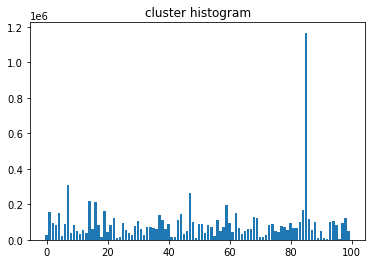

In [50]:
pred=kmeans.predict(Xt)
plt.title("cluster histogram")
cl , co = np.unique(pred, return_counts=True)
plt.bar(cl ,co )
plt.show()

In [51]:
for i,j in zip(cl , co) :
    print("cluser {} : {}".format(i,j))

cluser 0 : 29067
cluser 1 : 157062
cluser 2 : 94965
cluser 3 : 85728
cluser 4 : 150100
cluser 5 : 21944
cluser 6 : 89824
cluser 7 : 309978
cluser 8 : 39786
cluser 9 : 81232
cluser 10 : 49713
cluser 11 : 30942
cluser 12 : 53447
cluser 13 : 36244
cluser 14 : 218791
cluser 15 : 62951
cluser 16 : 211280
cluser 17 : 83253
cluser 18 : 15349
cluser 19 : 161183
cluser 20 : 42342
cluser 21 : 81836
cluser 22 : 121514
cluser 23 : 11153
cluser 24 : 15365
cluser 25 : 96847
cluser 26 : 52957
cluser 27 : 35666
cluser 28 : 27373
cluser 29 : 80006
cluser 30 : 106921
cluser 31 : 58500
cluser 32 : 28875
cluser 33 : 70721
cluser 34 : 74158
cluser 35 : 68216
cluser 36 : 62362
cluser 37 : 139435
cluser 38 : 112635
cluser 39 : 58181
cluser 40 : 90166
cluser 41 : 17591
cluser 42 : 13984
cluser 43 : 111543
cluser 44 : 144618
cluser 45 : 35412
cluser 46 : 49067
cluser 47 : 261158
cluser 48 : 102276
cluser 49 : 9189
cluser 50 : 90955
cluser 51 : 86459
cluser 52 : 37229
cluser 53 : 82890
cluser 54 : 71125
cluser 

In [53]:
from sklearn.manifold import TSNE
sample_n = 10000
idx = np.random.randint(Xt.shape[0], size=sample_n)


# pred=pipe.predict()
X_embedded = TSNE(n_components=2).fit_transform(Xt[idx,:])

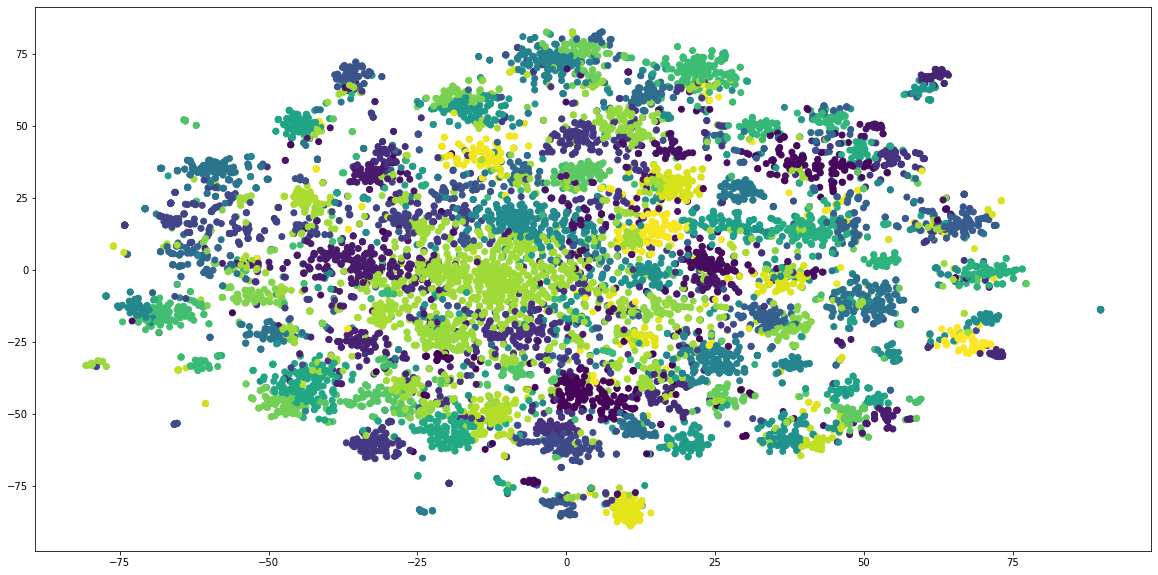

In [54]:

pred=kmeans.predict(Xt[idx,:])
plt.figure(figsize=(20,10))
plt.scatter(X_embedded[:,0] , X_embedded[:,1]  , c = pred*2 )
plt.show()